In [2]:
import pandas as pd
import numpy as np

In [5]:
speeds = pd.DataFrame(

    [

        ("bird", "Falconiformes", 389.0),

        ("bird", "Psittaciformes", 24.0),

        ("mammal", "Carnivora", 80.2),

        ("mammal", "Primates", np.nan),

        ("mammal", "Carnivora", 58),

    ],

    index=["falcon", "parrot", "lion", "monkey", "leopard"],

    columns=("class", "order", "max_speed"),

)



speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [6]:
grouped = speeds.groupby("class")

In [8]:
grouped

In [7]:
grouped = speeds.groupby(["class", "order"])

In [9]:
grouped

In [10]:
df = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)



df

,A,B,C,D
0,foo,one,-0.508504,-0.300867
1,bar,one,-2.902925,0.941785
2,foo,two,-0.799524,0.800131
3,bar,three,0.761373,-0.721042
4,foo,two,-0.514624,1.171055
5,bar,two,0.038246,-0.037845
6,foo,one,-0.378629,-0.405836
7,foo,three,-0.575681,1.412087


In [11]:
grouped = df.groupby("A")

grouped = df.groupby("B")

grouped = df.groupby(["A", "B"])

In [14]:
df2 = df.set_index(["A", "B"])

In [15]:
df2.index.names.difference(["B"])

FrozenList(['A'])

In [16]:
grouped = df2.groupby(level=df2.index.names.difference(["B"]))

grouped.sum()

,C,D
A,,
bar,-2.103306,0.182897
foo,-2.776962,2.676570


In [17]:
df

,A,B,C,D
0,foo,one,-0.508504,-0.300867
1,bar,one,-2.902925,0.941785
2,foo,two,-0.799524,0.800131
3,bar,three,0.761373,-0.721042
4,foo,two,-0.514624,1.171055
5,bar,two,0.038246,-0.037845
6,foo,one,-0.378629,-0.405836
7,foo,three,-0.575681,1.412087


In [18]:
df.T

,0,1,2,3,4,5,6,7
A,foo,bar,foo,bar,foo,bar,foo,foo
B,one,one,two,three,two,two,one,three
C,-0.508504,-2.902925,-0.799524,0.761373,-0.514624,0.038246,-0.378629,-0.575681
D,-0.300867,0.941785,0.800131,-0.721042,1.171055,-0.037845,-0.405836,1.412087


In [19]:
def get_letter_type(letter):

    if letter.lower() in 'aeiou':

        return 'vowel'

    else:

        return 'consonant'



grouped = df.T.groupby(get_letter_type)

In [22]:
list(grouped)

[('consonant',
            0         1         2         3         4         5         6  \
  B       one       one       two     three       two       two       one   
  C -0.508504 -2.902925 -0.799524  0.761373 -0.514624  0.038246 -0.378629   
  D -0.300867  0.941785  0.800131 -0.721042  1.171055 -0.037845 -0.405836   
  
            7  
  B     three  
  C -0.575681  
  D  1.412087  ),
 ('vowel',
       0    1    2    3    4    5    6    7
  A  foo  bar  foo  bar  foo  bar  foo  foo)]

In [21]:
dict(list(grouped))

{'consonant':           0         1         2         3         4         5         6  \
 B       one       one       two     three       two       two       one   
 C -0.508504 -2.902925 -0.799524  0.761373 -0.514624  0.038246 -0.378629   
 D -0.300867  0.941785  0.800131 -0.721042  1.171055 -0.037845 -0.405836   
 
           7  
 B     three  
 C -0.575681  
 D  1.412087  ,
 'vowel':      0    1    2    3    4    5    6    7
 A  foo  bar  foo  bar  foo  bar  foo  foo}

In [23]:
index = [1, 2, 3, 1, 2, 3]

s = pd.Series([1, 2, 3, 10, 20, 30], index=index)

s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [24]:
grouped = s.groupby(level=0)

grouped.first()

1    1
2    2
3    3
dtype: int64

In [25]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [26]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

In [27]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})

df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [28]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [30]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [31]:
df3.groupby("X").get_group("A")

,X,Y
0,A,1
2,A,3


In [32]:
df3.groupby(["X"]).get_group(("B",))

,X,Y
1,B,4
3,B,2


In [37]:
grouped = df3.groupby(["X"])
for group in df3.groupby(["X"]):
    print(grouped.get_group(group[0]))
    print()

   X  Y
0  A  1
2  A  3

   X  Y
1  B  4
3  B  2



In [38]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]

df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])

df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [39]:
# Default ``dropna`` is set to True, which will exclude NaNs in keys

df_dropna.groupby(by=["b"], dropna=True).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [40]:
df_dropna.groupby(by=["a"], dropna=True).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [41]:
# In order to allow NaN in keys, set ``dropna`` to False

df_dropna.groupby(by=["b"], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [42]:
df_dropna.groupby(by=["a"], dropna=False).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [46]:
df

,A,B,C,D
0,foo,one,-0.508504,-0.300867
1,bar,one,-2.902925,0.941785
2,foo,two,-0.799524,0.800131
3,bar,three,0.761373,-0.721042
4,foo,two,-0.514624,1.171055
5,bar,two,0.038246,-0.037845
6,foo,one,-0.378629,-0.405836
7,foo,three,-0.575681,1.412087


In [43]:
df.groupby("A").groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [44]:
type(df.groupby("A").groups)

pandas.io.formats.printing.PrettyDict

In [45]:
df.T.groupby(get_letter_type).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [47]:
grouped = df.groupby(["A", "B"])

grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [48]:
len(grouped)

6

In [49]:
n = 10

weight = np.random.normal(166, 20, size=n)

height = np.random.normal(60, 10, size=n)

time = pd.date_range("1/1/2000", periods=n)

gender = np.random.choice(["male", "female"], size=n)

df = pd.DataFrame(

    {"height": height, "weight": weight, "gender": gender}, index=time

)



df

,height,weight,gender
2000-01-01,70.061278,151.952109,female
2000-01-02,48.641225,184.315163,male
2000-01-03,78.057669,180.824030,male
2000-01-04,55.084145,183.839620,female
2000-01-05,47.292636,166.699377,male
2000-01-06,55.304786,170.528019,female
2000-01-07,73.073936,200.049017,male
2000-01-08,60.743282,189.559258,female
2000-01-09,65.020631,177.442042,female
2000-01-10,62.595845,196.619704,female


In [50]:
gb = df.groupby("gender")

In [51]:
gb.groups

{'female': [2000-01-01 00:00:00, 2000-01-04 00:00:00, 2000-01-06 00:00:00, 2000-01-08 00:00:00, 2000-01-09 00:00:00, 2000-01-10 00:00:00], 'male': [2000-01-02 00:00:00, 2000-01-03 00:00:00, 2000-01-05 00:00:00, 2000-01-07 00:00:00]}

In [53]:
arrays = [

    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

    ["one", "two", "one", "two", "one", "two", "one", "two"],

]



index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)

s

first  second
bar    one      -1.465595
       two      -0.456278
baz    one      -0.442034
       two      -0.831861
foo    one      -0.133509
       two      -1.466570
qux    one      -0.690014
       two      -1.161049
dtype: float64

In [54]:
grouped = s.groupby(level=0)

grouped.sum()

first
bar   -1.921873
baz   -1.273894
foo   -1.600079
qux   -1.851063
dtype: float64

In [55]:
s.groupby(level="second").sum()

second
one   -2.731152
two   -3.915757
dtype: float64

In [56]:
arrays = [

    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

    ["doo", "doo", "bee", "bee", "bop", "bop", "bop", "bop"],

    ["one", "two", "one", "two", "one", "two", "one", "two"],

]



index = pd.MultiIndex.from_arrays(arrays, names=["first", "second", "third"])

s = pd.Series(np.random.randn(8), index=index)

s

first  second  third
bar    doo     one      0.409432
               two     -1.027449
baz    bee     one     -0.559599
               two     -0.481016
foo    bop     one      2.722502
               two     -0.789998
qux    bop     one      0.648725
               two      1.583975
dtype: float64

In [59]:
s.groupby(level=["second", "third"]).sum()

second  third
bee     one     -0.559599
        two     -0.481016
bop     one      3.371227
        two      0.793977
doo     one      0.409432
        two     -1.027449
dtype: float64

In [58]:
s.groupby(["first", "second"]).sum()

first  second
bar    doo      -0.618017
baz    bee      -1.040615
foo    bop       1.932504
qux    bop       2.232700
dtype: float64

In [60]:
arrays = [

    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

    ["one", "two", "one", "two", "one", "two", "one", "two"],

]



index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [61]:
df.groupby([pd.Grouper(level=1), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [67]:
df.groupby(["second", "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [68]:
df = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)


df

,A,B,C,D
0,foo,one,-2.303007,-0.124828
1,bar,one,0.530011,-2.152640
2,foo,two,-1.365241,-0.329209
3,bar,three,0.790238,0.372214
4,foo,two,1.834747,1.229227
5,bar,two,0.946750,-0.955417
6,foo,one,0.117235,-0.349089
7,foo,three,0.776245,0.978859


In [69]:
grouped = df.groupby(["A"])

grouped_C = grouped["C"]

grouped_D = grouped["D"]

In [70]:
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [76]:
grouped_C

In [77]:
df["C"].groupby(df["A"])

In [78]:
grouped[["A", "B"]].sum()

,A,B
A,,
bar,barbarbar,onethreetwo
foo,foofoofoofoofoo,onetwotwoonethree


In [79]:
grouped = df.groupby('A')

for name, group in grouped:

    print(name)

    print(group)

bar
     A      B         C         D
1  bar    one  0.530011 -2.152640
3  bar  three  0.790238  0.372214
5  bar    two  0.946750 -0.955417
foo
     A      B         C         D
0  foo    one -2.303007 -0.124828
2  foo    two -1.365241 -0.329209
4  foo    two  1.834747  1.229227
6  foo    one  0.117235 -0.349089
7  foo  three  0.776245  0.978859


In [80]:
for name, group in df.groupby(['A', 'B']):

    print(name)

    print(group)

('bar', 'one')
     A    B         C        D
1  bar  one  0.530011 -2.15264
('bar', 'three')
     A      B         C         D
3  bar  three  0.790238  0.372214
('bar', 'two')
     A    B        C         D
5  bar  two  0.94675 -0.955417
('foo', 'one')
     A    B         C         D
0  foo  one -2.303007 -0.124828
6  foo  one  0.117235 -0.349089
('foo', 'three')
     A      B         C         D
7  foo  three  0.776245  0.978859
('foo', 'two')
     A    B         C         D
2  foo  two -1.365241 -0.329209
4  foo  two  1.834747  1.229227


In [81]:
grouped.get_group("bar")

,A,B,C,D
1,bar,one,0.530011,-2.152640
3,bar,three,0.790238,0.372214
5,bar,two,0.946750,-0.955417


In [82]:
df.groupby(["A", "B"]).get_group(("bar", "one"))

,A,B,C,D
1,bar,one,0.530011,-2.15264


In [87]:
animals = pd.DataFrame(

    {

        "kind": ["cat", "dog", "cat", "dog", "bird"],

        "height": [9.1, 6.0, 9.5, 34.0, 5.0],

        "weight": [7.9, 7.5, 9.9, 198.0, 20.0],

    }

)

animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0
4,bird,5.0,20.0


In [88]:
animals.groupby("kind").sum()

,height,weight
kind,,
bird,5.0,20.0
cat,18.6,17.8
dog,40.0,205.5


In [89]:
animals.groupby("kind", as_index=False).sum()

,kind,height,weight
0,bird,5.0,20.0
1,cat,18.6,17.8
2,dog,40.0,205.5


In [90]:
df

,A,B,C,D
0,foo,one,-2.303007,-0.124828
1,bar,one,0.530011,-2.152640
2,foo,two,-1.365241,-0.329209
3,bar,three,0.790238,0.372214
4,foo,two,1.834747,1.229227
5,bar,two,0.946750,-0.955417
6,foo,one,0.117235,-0.349089
7,foo,three,0.776245,0.978859


In [91]:
df.groupby("A")[["C", "D"]].max()

,C,D
A,,
bar,0.946750,0.372214
foo,1.834747,1.229227


In [92]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    0.530011 -2.152640
    three  0.790238  0.372214
    two    0.946750 -0.955417
foo one   -1.092886 -0.236958
    three  0.776245  0.978859
    two    0.234753  0.450009

In [95]:
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [93]:
grouped.size()

A
bar    3
foo    5
dtype: int64

In [96]:
grouped.describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0  0.755666  0.210510  0.530011  0.660125  0.790238  0.868494   
foo   5.0 -0.188004  1.656321 -2.303007 -1.365241  0.117235  0.776245   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.946750   3.0 -0.911948  1.262989 -2.152640 -1.554029 -0.955417   
foo  1.834747   5.0  0.280992  0.761611 -0.349089 -0.329209 -0.124828   

                         
          75%       max  
A                        
bar -0.291601  0.372214  
foo  0.978859  1.229227

In [97]:
ll = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]

df4 = pd.DataFrame(ll, columns=["A", "B"])

df4

,A,B
0,foo,1
1,foo,2
2,foo,2
3,bar,1
4,bar,1


In [98]:
df4.groupby("A")["B"].nunique()

A
bar    1
foo    2
Name: B, dtype: int64

In [101]:
df

,A,B,C,D
0,foo,one,-2.303007,-0.124828
1,bar,one,0.530011,-2.152640
2,foo,two,-1.365241,-0.329209
3,bar,three,0.790238,0.372214
4,foo,two,1.834747,1.229227
5,bar,two,0.946750,-0.955417
6,foo,one,0.117235,-0.349089
7,foo,three,0.776245,0.978859


In [99]:
grouped = df.groupby("A")
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [100]:
grouped[["C", "D"]].aggregate("sum")

,C,D
A,,
bar,2.266999,-2.735843
foo,-0.940021,1.404960


In [103]:
grouped = df.groupby(["A", "B"])
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [104]:
grouped.agg("sum")

C         D
A   B                        
bar one    0.530011 -2.152640
    three  0.790238  0.372214
    two    0.946750 -0.955417
foo one   -2.185772 -0.473917
    three  0.776245  0.978859
    two    0.469506  0.900018

In [105]:
grouped = df.groupby(["A", "B"], as_index=False)

grouped.agg("sum")

,A,B,C,D
0,bar,one,0.530011,-2.152640
1,bar,three,0.790238,0.372214
2,bar,two,0.946750,-0.955417
3,foo,one,-2.185772,-0.473917
4,foo,three,0.776245,0.978859
5,foo,two,0.469506,0.900018


In [106]:
df.groupby("A", as_index=False)[["C", "D"]].agg("sum")

,A,C,D
0,bar,2.266999,-2.735843
1,foo,-0.940021,1.404960


In [107]:
df.groupby(["A", "B"]).agg("sum").reset_index()

,A,B,C,D
0,bar,one,0.530011,-2.152640
1,bar,three,0.790238,0.372214
2,bar,two,0.946750,-0.955417
3,foo,one,-2.185772,-0.473917
4,foo,three,0.776245,0.978859
5,foo,two,0.469506,0.900018


In [108]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0
4,bird,5.0,20.0


In [109]:
animals.groupby("kind")[["height"]].agg(lambda x: set(x))

,height
kind,
bird,{5.0}
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [141]:
type(animals.groupby("kind")[["height"]].agg(lambda x: set(x)).loc["cat", "height"])

set

In [114]:
animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int).sum())

,height
kind,
bird,5
cat,18
dog,40


In [140]:
type(animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int)).loc["cat", "height"])

numpy.ndarray

In [142]:
grouped = df.groupby("A")

In [143]:
grouped["C"].agg(["sum", "mean", "std"])

,sum,mean,std
A,,,
bar,2.266999,0.755666,0.210510
foo,-0.940021,-0.188004,1.656321


In [144]:
grouped[["C", "D"]].agg(["sum", "mean", "std"])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  2.266999  0.755666  0.210510 -2.735843 -0.911948  1.262989
foo -0.940021 -0.188004  1.656321  1.404960  0.280992  0.761611

In [148]:
(

    grouped["C"]

    .agg(["sum", "mean", "std"])

    .rename(columns={"sum": "foo", "mean": "bar", "std": "baz"})

)

,foo,bar,baz
A,,,
bar,2.266999,0.755666,0.210510
foo,-0.940021,-0.188004,1.656321


In [149]:
(

    grouped[["C", "D"]].agg(["sum", "mean", "std"]).rename(

        columns={"sum": "foo", "mean": "bar", "std": "baz"}

    )

)

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar  2.266999  0.755666  0.210510 -2.735843 -0.911948  1.262989
foo -0.940021 -0.188004  1.656321  1.404960  0.280992  0.761611

In [150]:
grouped["C"].agg(["sum", "sum"])

,sum,sum
A,,
bar,2.266999,2.266999
foo,-0.940021,-0.940021


In [151]:
(

    grouped[["C", "D"]].agg(["sum", "mean", "std"]).rename(

        columns={"sum": "foo", "mean": "foo", "std": "baz"}

    )

)

C                             D                    
          foo       foo       baz       foo       foo       baz
A                                                              
bar  2.266999  0.755666  0.210510 -2.735843 -0.911948  1.262989
foo -0.940021 -0.188004  1.656321  1.404960  0.280992  0.761611

In [152]:
grouped["C"].agg([lambda x: x.max() - x.min(), lambda x: x.median() - x.mean()])

,<lambda_0>,<lambda_1>
A,,
bar,0.416739,0.034572
foo,4.137755,0.305239


In [153]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0
4,bird,5.0,20.0


In [154]:
animals.groupby("kind").agg(

    min_height=pd.NamedAgg(column="height", aggfunc="min"),

    max_height=pd.NamedAgg(column="height", aggfunc="max"),

    average_weight=pd.NamedAgg(column="weight", aggfunc="mean"),

)

,min_height,max_height,average_weight
kind,,,
bird,5.0,5.0,20.00
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [155]:
animals.groupby("kind").agg(

    min_height=("height", "min"),

    max_height=("height", "max"),

    average_weight=("weight", "mean"),

)

,min_height,max_height,average_weight
kind,,,
bird,5.0,5.0,20.00
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [157]:
pd.NamedAgg(column="weight", aggfunc="sum")

NamedAgg(column='weight', aggfunc='sum')

In [156]:
animals.groupby("kind").agg(

    **{

        "total weight": pd.NamedAgg(column="weight", aggfunc="sum")

    }

)

,total weight
kind,
bird,20.0
cat,17.8
dog,205.5


In [161]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0
4,bird,5.0,20.0


In [163]:
tmp = animals.groupby("kind")

In [164]:
tmp.groups

{'bird': [4], 'cat': [0, 2], 'dog': [1, 3]}

In [169]:
tmp.height

In [162]:
animals.groupby("kind").height.agg(

    min_height="min",

    max_height="max",

)

,min_height,max_height
kind,,
bird,5.0,5.0
cat,9.1,9.5
dog,6.0,34.0


In [172]:
from functools import partial

# Custom function that needs extra parameters
def weighted_avg(data, weights):
    # Make sure data and weights align within each group
    return np.average(data, weights=weights.loc[data.index])

# Create sample data
df = pd.DataFrame({
    'kind': ['cat', 'cat', 'dog', 'dog'],
    'weight': [8, 10, 20, 25],
    'height': [30, 35, 60, 65],
    'importance': [1, 2, 1, 3]  # weights for weighted average
})

df

,kind,weight,height,importance
0,cat,8,30,1
1,cat,10,35,2
2,dog,20,60,1
3,dog,25,65,3


In [173]:
# Using partial to fix the weights parameter
weighted_avg_partial = partial(weighted_avg, weights=df['importance'])

# Use in named aggregation
result = df.groupby('kind').agg(
    **{
        'weighted_height': pd.NamedAgg(
            column='height', 
            aggfunc=weighted_avg_partial
        )
    }
)

In [174]:
result

,weighted_height
kind,
cat,33.333333
dog,63.750000


In [177]:
from functools import partial

# Create partial function for 95th percentile
percentile_95 = partial(np.percentile, q=95)

result = df.groupby('kind').agg(
    **{
        'height_95th': pd.NamedAgg(
            column='height', 
            aggfunc=percentile_95
        )
    }
)

result

,height_95th
kind,
cat,34.75
dog,64.75


In [178]:
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [179]:
grouped.agg({"C": "sum", "D": lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,2.266999,1.262989
foo,-0.940021,0.761611


In [180]:
grouped.agg({"C": "sum", "D": "std"})

,C,D
A,,
bar,2.266999,1.262989
foo,-0.940021,0.761611


In [181]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [182]:
grouped = speeds.groupby("class")["max_speed"]
grouped.groups

{'bird': ['falcon', 'parrot'], 'mammal': ['lion', 'monkey', 'leopard']}

In [183]:
grouped.cumsum()

falcon     389.0
parrot     413.0
lion        80.2
monkey       NaN
leopard    138.2
Name: max_speed, dtype: float64

In [184]:
grouped.diff()

falcon       NaN
parrot    -365.0
lion         NaN
monkey       NaN
leopard      NaN
Name: max_speed, dtype: float64

In [185]:
result = speeds.copy()

result["cumsum"] = grouped.cumsum()

result["diff"] = grouped.diff()

result

,class,order,max_speed,cumsum,diff
falcon,bird,Falconiformes,389.0,389.0,NaN
parrot,bird,Psittaciformes,24.0,413.0,-365.0
lion,mammal,Carnivora,80.2,80.2,NaN
monkey,mammal,Primates,NaN,NaN,NaN
leopard,mammal,Carnivora,58.0,138.2,NaN


In [186]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [187]:
grouped = speeds.groupby("class")[["max_speed"]]

In [188]:
grouped.transform("cumsum")

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [189]:
grouped.transform("sum")

,max_speed
falcon,413.0
parrot,413.0
lion,138.2
monkey,138.2
leopard,138.2


In [193]:
index = pd.date_range("10/1/1999", periods=1100)

ts = pd.Series(np.random.normal(0.5, 2, 1100), index)

ts.head()

1999-10-01    2.037036
1999-10-02   -1.194558
1999-10-03   -1.906768
1999-10-04    0.019421
1999-10-05    1.477651
Freq: D, dtype: float64

In [194]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

ts.head()

2000-01-08    0.395716
2000-01-09    0.357566
2000-01-10    0.346749
2000-01-11    0.384064
2000-01-12    0.383438
Freq: D, dtype: float64

In [195]:
ts.tail()

2002-09-30    0.213936
2002-10-01    0.243060
2002-10-02    0.258155
2002-10-03    0.239136
2002-10-04    0.232175
Freq: D, dtype: float64

In [196]:
transformed = ts.groupby(lambda x: x.year).transform(

    lambda x: (x - x.mean()) / x.std()

)

In [197]:
transformed.head()

2000-01-08    0.039639
2000-01-09   -0.178863
2000-01-10   -0.240816
2000-01-11   -0.027097
2000-01-12   -0.030680
Freq: D, dtype: float64

In [198]:
transformed.tail()

2002-09-30   -0.904975
2002-10-01   -0.721060
2002-10-02   -0.625738
2002-10-03   -0.745837
2002-10-04   -0.789800
Freq: D, dtype: float64

In [199]:
# Original Data

grouped = ts.groupby(lambda x: x.year)

grouped.mean()

2000    0.388795
2001    0.443674
2002    0.357243
dtype: float64

In [200]:
grouped.std()

2000    0.174599
2001    0.197263
2002    0.158355
dtype: float64

In [201]:
# Transformed Data

grouped_trans = transformed.groupby(lambda x: x.year)

grouped_trans.mean()

2000    5.102696e-17
2001    2.507887e-16
2002   -2.068141e-16
dtype: float64

In [202]:
transformed.mean()

2.839331611428972e-17

In [203]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

<Axes: >

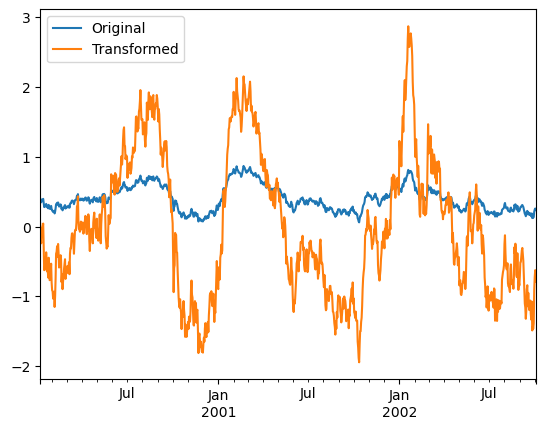

In [204]:
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})

compare.plot()

In [205]:
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2000-01-08    0.658388
2000-01-09    0.658388
2000-01-10    0.658388
2000-01-11    0.658388
2000-01-12    0.658388
                ...   
2002-09-30    0.690710
2002-10-01    0.690710
2002-10-02    0.690710
2002-10-03    0.690710
2002-10-04    0.690710
Freq: D, Length: 1001, dtype: float64

In [206]:
cols = ["A", "B", "C"]

values = np.random.randn(1000, 3)

values[np.random.randint(0, 1000, 100), 0] = np.nan

values[np.random.randint(0, 1000, 50), 1] = np.nan

values[np.random.randint(0, 1000, 200), 2] = np.nan

data_df = pd.DataFrame(values, columns=cols)

data_df

,A,B,C
0,-0.303476,1.768003,1.629008
1,-1.196173,NaN,-0.531380
2,-0.598455,-0.574650,0.980676
3,-0.490260,0.793558,-0.083925
4,NaN,0.034810,NaN
...,...,...,...
995,-0.681851,-0.663463,-0.332726
996,2.230961,-0.147677,NaN
997,-1.264652,1.244593,-2.574560
998,-0.399505,1.180156,0.331089


In [211]:
countries = np.array(["US", "UK", "GR", "JP"])

key = countries[np.random.randint(0, 4, 1000)]

grouped = data_df.groupby(key)

In [212]:
# Non-NA count in each group

grouped.count()

,A,B,C
GR,219,241,208
JP,226,236,194
UK,233,236,213
US,227,237,197


In [213]:
transformed = grouped.transform(lambda x: x.fillna(x.mean()))

In [214]:
transformed.count()

A    1000
B    1000
C    1000
dtype: int64

In [215]:
transformed.groupby(key).count()

,A,B,C
GR,251,251,251
JP,247,247,247
UK,256,256,256
US,246,246,246


In [216]:
grouped_trans = transformed.groupby(key)

grouped.mean()  # original group means

,A,B,C
GR,0.029079,0.014112,-0.022764
JP,-0.041465,0.063341,-0.048983
UK,0.006310,0.097479,0.111475
US,0.016439,0.023440,0.051678


In [217]:
grouped_trans.mean()  # transformation did not change group means

,A,B,C
GR,0.029079,0.014112,-0.022764
JP,-0.041465,0.063341,-0.048983
UK,0.006310,0.097479,0.111475
US,0.016439,0.023440,0.051678


In [218]:
grouped.count()  # original has some missing data points

,A,B,C
GR,219,241,208
JP,226,236,194
UK,233,236,213
US,227,237,197


In [219]:
grouped_trans.count()  # counts after transformation

,A,B,C
GR,251,251,251
JP,247,247,247
UK,256,256,256
US,246,246,246


In [220]:
grouped_trans.size()  # Verify non-NA count equals group size

GR    251
JP    247
UK    256
US    246
dtype: int64

In [221]:
# In the code below, the inefficient way using a UDF is commented out
# and the faster alternative appears below.

# result = ts.groupby(lambda x: x.year).transform(
#     lambda x: (x - x.mean()) / x.std()
# )

grouped = ts.groupby(lambda x: x.year)

result = (ts - grouped.transform("mean")) / grouped.transform("std")

# result = ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

grouped = ts.groupby(lambda x: x.year)

result = grouped.transform("max") - grouped.transform("min")

# grouped = data_df.groupby(key)
# result = grouped.transform(lambda x: x.fillna(x.mean()))

grouped = data_df.groupby(key)

result = data_df.fillna(grouped.transform("mean"))

In [222]:
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})

df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [224]:
df_re.groupby("A").groups

{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 5: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [223]:
df_re.groupby("A").rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [225]:
df_re.groupby("A").expanding().sum()

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [226]:
df_re = pd.DataFrame(

    {

        "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),

        "group": [1, 1, 2, 2],

        "val": [5, 6, 7, 8],

    }

).set_index("date")



df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [227]:
df_re.groupby("group").resample("1D", include_groups=False).ffill()

val
group date           
1     2016-01-03    5
      2016-01-04    5
      2016-01-05    5
      2016-01-06    5
      2016-01-07    5
      2016-01-08    5
      2016-01-09    5
      2016-01-10    6
2     2016-01-17    7
      2016-01-18    7
      2016-01-19    7
      2016-01-20    7
      2016-01-21    7
      2016-01-22    7
      2016-01-23    7
      2016-01-24    8

In [228]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [231]:
speeds.groupby("class").nth(1)

,class,order,max_speed
parrot,bird,Psittaciformes,24.0
monkey,mammal,Primates,NaN


In [232]:
speeds.groupby("class")[["order", "max_speed"]].nth(1)

,order,max_speed
parrot,Psittaciformes,24.0
monkey,Primates,NaN


In [234]:
product_volumes = pd.DataFrame(

    {

        "group": list("xxxxyyy"),

        "product": list("abcdefg"),

        "volume": [10, 30, 20, 15, 40, 10, 20],

    }

)

product_volumes

,group,product,volume
0,x,a,10
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
5,y,f,10
6,y,g,20


In [235]:
# Sort by volume to select the largest products first

product_volumes = product_volumes.sort_values("volume", ascending=False)

grouped = product_volumes.groupby("group")["volume"]

cumpct = grouped.cumsum() / grouped.transform("sum")

cumpct

4    0.571429
1    0.400000
2    0.666667
6    0.857143
3    0.866667
0    1.000000
5    1.000000
Name: volume, dtype: float64

In [236]:
grouped.groups

{'x': [1, 2, 3, 0], 'y': [4, 6, 5]}

In [237]:
significant_products = product_volumes[cumpct <= 0.9]

significant_products.sort_values(["group", "product"])

,group,product,volume
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
6,y,g,20


In [238]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [240]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [241]:
dff.groupby("B").filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [242]:
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [245]:
dff["C"] = np.arange(8)

dff

,A,B,C
0,0,a,0
1,1,a,1
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5
6,6,c,6
7,7,c,7


In [247]:
dff.groupby("B").groups

{'a': [0, 1], 'b': [2, 3, 4, 5], 'c': [6, 7]}

In [250]:
dff.groupby("B").filter(lambda x: len(x["C"]) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


In [252]:
df = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)

df

,A,B,C,D
0,foo,one,0.426976,0.493788
1,bar,one,-1.153469,-1.038706
2,foo,two,0.772199,0.235223
3,bar,three,0.090792,2.156929
4,foo,two,0.922328,-1.495908
5,bar,two,-0.835672,1.159978
6,foo,one,0.343466,0.200519
7,foo,three,-0.052838,-0.974991


In [253]:
grouped = df.groupby("A")

# could also just call .describe()

grouped["C"].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.632783
     std      0.646466
     min     -1.153469
     25%     -0.994570
     50%     -0.835672
     75%     -0.372440
     max      0.090792
foo  count    5.000000
     mean     0.482426
     std      0.382875
     min     -0.052838
     25%      0.343466
     50%      0.426976
     75%      0.772199
     max      0.922328
Name: C, dtype: float64

In [254]:
grouped = df.groupby('A')['C']

def f(group):

    return pd.DataFrame({'original': group,

                         'demeaned': group - group.mean()})



grouped.apply(f)

original  demeaned
A                        
bar 1 -1.153469 -0.520686
    3  0.090792  0.723574
    5 -0.835672 -0.202889
foo 0  0.426976 -0.055450
    2  0.772199  0.289773
    4  0.922328  0.439902
    6  0.343466 -0.138960
    7 -0.052838 -0.535264

In [255]:
def f(x):

    return pd.Series([x, x ** 2], index=["x", "x^2"])



s = pd.Series(np.random.rand(5))

s

0    0.117574
1    0.019587
2    0.266472
3    0.171396
4    0.344661
dtype: float64

In [256]:
s.apply(f)

,x,x^2
0,0.117574,0.013824
1,0.019587,0.000384
2,0.266472,0.071007
3,0.171396,0.029377
4,0.344661,0.118791


In [263]:
df.groupby("A", group_keys=True).apply(lambda x: x, include_groups=False)

B         C         D
A                               
bar 1    one -1.153469 -1.038706
    3  three  0.090792  2.156929
    5    two -0.835672  1.159978
foo 0    one  0.426976  0.493788
    2    two  0.772199  0.235223
    4    two  0.922328 -1.495908
    6    one  0.343466  0.200519
    7  three -0.052838 -0.974991

In [258]:
df.groupby("A", group_keys=False).apply(lambda x: x, include_groups=False)

,B,C,D
0,one,0.426976,0.493788
1,one,-1.153469,-1.038706
2,two,0.772199,0.235223
3,three,0.090792,2.156929
4,two,0.922328,-1.495908
5,two,-0.835672,1.159978
6,one,0.343466,0.200519
7,three,-0.052838,-0.974991


In [259]:
df.groupby("A", group_keys=True).apply(lambda x: x, include_groups=True)

C:\Users\YOSSI\AppData\Local\Temp\ipykernel_20996\3894787425.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("A", group_keys=True).apply(lambda x: x, include_groups=True)


A      B         C         D
A                                    
bar 1  bar    one -1.153469 -1.038706
    3  bar  three  0.090792  2.156929
    5  bar    two -0.835672  1.159978
foo 0  foo    one  0.426976  0.493788
    2  foo    two  0.772199  0.235223
    4  foo    two  0.922328 -1.495908
    6  foo    one  0.343466  0.200519
    7  foo  three -0.052838 -0.974991

In [261]:
df.groupby("A", group_keys=False).apply(lambda x: x, include_groups=True)

C:\Users\YOSSI\AppData\Local\Temp\ipykernel_20996\496436233.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("A", group_keys=False).apply(lambda x: x, include_groups=True)


,A,B,C,D
0,foo,one,0.426976,0.493788
1,bar,one,-1.153469,-1.038706
2,foo,two,0.772199,0.235223
3,bar,three,0.090792,2.156929
4,foo,two,0.922328,-1.495908
5,bar,two,-0.835672,1.159978
6,foo,one,0.343466,0.200519
7,foo,three,-0.052838,-0.974991


In [264]:
df

,A,B,C,D
0,foo,one,0.426976,0.493788
1,bar,one,-1.153469,-1.038706
2,foo,two,0.772199,0.235223
3,bar,three,0.090792,2.156929
4,foo,two,0.922328,-1.495908
5,bar,two,-0.835672,1.159978
6,foo,one,0.343466,0.200519
7,foo,three,-0.052838,-0.974991


In [265]:
df.groupby("A").std(numeric_only=True)

,C,D
A,,
bar,0.646466,1.635044
foo,0.382875,0.873577


In [266]:
from decimal import Decimal

df_dec = pd.DataFrame(

    {

        "id": [1, 2, 1, 2],

        "int_column": [1, 2, 3, 4],

        "dec_column": [

            Decimal("0.50"),

            Decimal("0.15"),

            Decimal("0.25"),

            Decimal("0.4\[0"),

        ],

    }

)


df_dec

,id,int_column,dec_column
0,1,1,0.50
1,2,2,0.15
2,1,3,0.25
3,2,4,0.40


In [267]:
df_dec.groupby(["id"])[["dec_column"]].sum()

,dec_column
id,
1,0.75
2,0.55


In [268]:
pd.Series([1, 1, 1]).groupby(

    pd.Categorical(["a", "a", "a"], categories=["a", "b"]), observed=False

).count()

a    3
b    0
dtype: int64

In [269]:
pd.Series([1, 1, 1]).groupby(

    pd.Categorical(["a", "a", "a"], categories=["a", "b"]), observed=True

).count()

a    3
dtype: int64

In [270]:
s = (

    pd.Series([1, 1, 1])

    .groupby(pd.Categorical(["a", "a", "a"], categories=["a", "b"]), observed=True)

    .count()

)



s.index.dtype

CategoricalDtype(categories=['a', 'b'], ordered=False, categories_dtype=object)

In [271]:
df = pd.DataFrame({"key": [1.0, 1.0, np.nan, 2.0, np.nan], "A": [1, 2, 3, 4, 5]})

df

,key,A
0,1.0,1
1,1.0,2
2,NaN,3
3,2.0,4
4,NaN,5


In [272]:
df.groupby("key", dropna=True).sum()

,A
key,
1.0,3
2.0,4


In [274]:
df.groupby("key", dropna=True).groups

{1.0: [0, 1], 2.0: [3]}

In [273]:
df.groupby("key", dropna=False).sum()

,A
key,
1.0,3
2.0,4
NaN,8


In [277]:
days = pd.Categorical(

    values=["Wed", "Mon", "Thu", "Mon", "Wed", "Sat"],

    categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],

)



data = pd.DataFrame(

   {

       "day": days,

       "workers": [3, 4, 1, 4, 2, 2],

   }

)



data

,day,workers
0,Wed,3
1,Mon,4
2,Thu,1
3,Mon,4
4,Wed,2
5,Sat,2


In [278]:
data.groupby("day", observed=False, sort=True).sum()

,workers
day,
Mon,8
Tue,0
Wed,5
Thu,1
Fri,0
Sat,2
Sun,0


In [279]:
data.groupby("day", observed=False, sort=False).sum()

,workers
day,
Wed,5
Mon,8
Thu,1
Sat,2
Tue,0
Fri,0
Sun,0


In [3]:
import datetime

df = pd.DataFrame(

    {

        "Branch": "A A A A A A A B".split(),

        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),

        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],

        "Date": [

            datetime.datetime(2013, 1, 1, 13, 0),

            datetime.datetime(2013, 1, 1, 13, 5),

            datetime.datetime(2013, 10, 1, 20, 0),

            datetime.datetime(2013, 10, 2, 10, 0),

            datetime.datetime(2013, 10, 1, 20, 0),

            datetime.datetime(2013, 10, 2, 10, 0),

            datetime.datetime(2013, 12, 2, 12, 0),

            datetime.datetime(2013, 12, 2, 14, 0),

        ],

    }

)



df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [4]:
df.groupby([pd.Grouper(freq="1ME", key="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [8]:
df = df.set_index("Date")

df

,Branch,Buyer,Quantity
Date,,,
2013-02-28 13:00:00,A,Carl,1
2013-02-28 13:05:00,A,Mark,3
2013-11-30 20:00:00,A,Carl,5
2013-11-30 10:00:00,A,Carl,1
2013-11-30 20:00:00,A,Joe,8
2013-11-30 10:00:00,A,Joe,1
2014-01-31 12:00:00,A,Joe,9
2014-01-31 14:00:00,B,Carl,3


In [9]:
df["Date"] = df.index + pd.offsets.MonthEnd(2)

df

,Branch,Buyer,Quantity,Date
Date,,,,
2013-02-28 13:00:00,A,Carl,1,2013-04-30 13:00:00
2013-02-28 13:05:00,A,Mark,3,2013-04-30 13:05:00
2013-11-30 20:00:00,A,Carl,5,2014-01-31 20:00:00
2013-11-30 10:00:00,A,Carl,1,2014-01-31 10:00:00
2013-11-30 20:00:00,A,Joe,8,2014-01-31 20:00:00
2013-11-30 10:00:00,A,Joe,1,2014-01-31 10:00:00
2014-01-31 12:00:00,A,Joe,9,2014-03-31 12:00:00
2014-01-31 14:00:00,B,Carl,3,2014-03-31 14:00:00


In [10]:
df.groupby([pd.Grouper(freq="6ME", key="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-04-30 Carl          1
           Mark          3
2014-04-30 Carl          9
           Joe          18

In [11]:
df.groupby([pd.Grouper(freq="6ME", level="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [12]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=["A", "B"])

df

,A,B
0,1,2
1,1,4
2,5,6


In [13]:
g = df.groupby("A")

g.head(1)

,A,B
0,1,2
2,5,6


In [14]:
g.tail(1)

,A,B
1,1,4
2,5,6


In [15]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0


In [16]:
g = df.groupby("A")

g.nth(0)

,A,B
0,1,NaN
2,5,6.0


In [17]:
g.nth(-1)

,A,B
1,1,4.0
2,5,6.0


In [18]:
g.nth(1)

,A,B
1,1,4.0


In [19]:
g.nth(5)

,A,B


In [20]:
# nth(0) is the same as g.first()
g.nth(0, dropna="any")

,A,B
1,1,4.0
2,5,6.0


In [26]:
# nth(0) is the same as g.first()
g.nth(0, dropna="all")

,A,B
0,1,NaN
2,5,6.0


In [21]:
g.first()

,B
A,
1,4.0
5,6.0


In [22]:
# nth(-1) is the same as g.last()

g.nth(-1, dropna="any")

,A,B
1,1,4.0
2,5,6.0


In [23]:
g.last()

,B
A,
1,4.0
5,6.0


In [24]:
g.B.nth(0, dropna="all")

1    4.0
2    6.0
Name: B, dtype: float64

In [25]:
g.B.nth(0, dropna="any")

1    4.0
2    6.0
Name: B, dtype: float64

In [30]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])

df

,a,b
2014-04-01,1,1
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [31]:
# get the first, 4th, and last date index for each month

df.groupby([df.index.year, df.index.month]).nth([0])

,a,b
2014-04-01,1,1
2014-05-01,1,1
2014-06-02,1,1


In [32]:
df.groupby([df.index.year, df.index.month]).nth([0, 3, -1])

,a,b
2014-04-01,1,1
2014-04-04,1,1
2014-04-30,1,1
2014-05-01,1,1
2014-05-06,1,1
2014-05-30,1,1
2014-06-02,1,1
2014-06-05,1,1
2014-06-30,1,1


In [42]:
df.groupby([df.index.year, df.index.month]).nth[1:]

,a,b
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
2014-04-08,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [44]:
(df.groupby([df.index.year, df.index.month]).nth[1:, :-1] == df.groupby([df.index.year, df.index.month]).nth[:]).all()

a    True
b    True
dtype: bool

In [48]:
df.groupby([df.index.year, df.index.month]).nth[1:3, 4:6]

,a,b
2014-04-02,1,1
2014-04-03,1,1
2014-04-07,1,1
2014-04-08,1,1
2014-05-02,1,1
2014-05-05,1,1
2014-05-07,1,1
2014-05-08,1,1
2014-06-03,1,1
2014-06-04,1,1


In [49]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [50]:
dfg.groupby("A").cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [51]:
dfg.groupby("A").cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64